# Project data exploration - looking at relplot and scatter
Using a dataset that your group is consider using for the term project, let's do some data exploring of the different features in your dataset and their relationships

Group name: Group 1

Created by NAMES (SJSU IDs) : Boseong Kang, David Heringer, Jaewon Kim, Geonho Lee

Last updated: DATE  09/28/2025

Briefly describe your dataset

Import your data. If you want to mount your Google drive you can use `from google.colab import drive` and `drive.mount('/content/drive')`

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
pwd

'/content'

In [4]:
data = '/content/drive/MyDrive/cs/cs133/dataset/apple-twitter-sentiment-texts.csv'
df_twitter = pd.read_csv(data)
df_twitter.head()

,text,sentiment
0,Wow. Yall needa step it up @Apple RT @heynyla:...,-1
1,What Happened To Apple Inc? http://t.co/FJEX...,0
2,Thank u @apple I can now compile all of the pi...,1
3,The oddly uplifting story of the Apple co-foun...,0
4,@apple can i exchange my iphone for a differen...,0


In [5]:
data = '/content/drive/MyDrive/cs/cs133/dataset/apple_stock.csv'
df_stock = pd.read_csv(data)
df_stock.head()

,Unnamed: 0,Adj Close,Close,High,Low,Open,Volume
0,1980-12-12,0.098834,0.128348,0.128906,0.128348,0.128348,469033600
1,1980-12-15,0.093678,0.121652,0.122210,0.121652,0.122210,175884800
2,1980-12-16,0.086802,0.112723,0.113281,0.112723,0.113281,105728000
3,1980-12-17,0.088951,0.115513,0.116071,0.115513,0.115513,86441600
4,1980-12-18,0.091530,0.118862,0.119420,0.118862,0.118862,73449600


In [6]:
df_twitter.info()
# df_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1630 entries, 0 to 1629
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       1630 non-null   object
 1   sentiment  1630 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 25.6+ KB


In [7]:
# df_twitter.columns
df_stock.columns

Index(['Unnamed: 0', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

### Q1: Show the number of missing data in each column of the dataframe

#twitter dataset


In [8]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1630 entries, 0 to 1629
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       1630 non-null   object
 1   sentiment  1630 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 25.6+ KB


In [9]:
df_twitter.isnull().sum()

,0
text,0
sentiment,0


#apple stock dataset


In [10]:
df_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11107 entries, 0 to 11106
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  11107 non-null  object 
 1   Adj Close   11107 non-null  float64
 2   Close       11107 non-null  float64
 3   High        11107 non-null  float64
 4   Low         11107 non-null  float64
 5   Open        11107 non-null  float64
 6   Volume      11107 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 607.5+ KB


In [11]:
#apple stock dataset
df_stock.isnull().sum()

,0
Unnamed: 0,0
Adj Close,0
Close,0
High,0
Low,0
Open,0
Volume,0


### Q2: Show the data type for each column of the dataframe

#twitter dataset

In [12]:
df_twitter.dtypes

,0
text,object
sentiment,int64


# apple stock dataset

In [13]:
df_stock.dtypes

,0
Unnamed: 0,object
Adj Close,float64
Close,float64
High,float64
Low,float64
Open,float64
Volume,int64


### Q3: Create a pair plot to show pairwise relationship in this dataset.
Draw the pairwise polynomial regression lines in a different color than the data points. Use a light color for the data points to deemphasizing the points to make the regression line stand out. Include a meaningful title to the plot.

In [14]:
data = '/content/drive/MyDrive/cs/cs133/dataset/apple_stock.csv'
df_stock = pd.read_csv(data)
df_stock.head()

,Unnamed: 0,Adj Close,Close,High,Low,Open,Volume
0,1980-12-12,0.098834,0.128348,0.128906,0.128348,0.128348,469033600
1,1980-12-15,0.093678,0.121652,0.122210,0.121652,0.122210,175884800
2,1980-12-16,0.086802,0.112723,0.113281,0.112723,0.113281,105728000
3,1980-12-17,0.088951,0.115513,0.116071,0.115513,0.115513,86441600
4,1980-12-18,0.091530,0.118862,0.119420,0.118862,0.118862,73449600


In [15]:
#create proper date column
if 'Unnamed: 0' in df_stock.columns:
  df_stock['Date'] = pd.to_datetime(df_stock['Unnamed: 0'], errors='coerce')
  df_stock = df_stock.drop(columns=['Unnamed: 0'])

df_stock

,Adj Close,Close,High,Low,Open,Volume,Date
0,0.098834,0.128348,0.128906,0.128348,0.128348,469033600,1980-12-12
1,0.093678,0.121652,0.122210,0.121652,0.122210,175884800,1980-12-15
2,0.086802,0.112723,0.113281,0.112723,0.113281,105728000,1980-12-16
3,0.088951,0.115513,0.116071,0.115513,0.115513,86441600,1980-12-17
4,0.091530,0.118862,0.119420,0.118862,0.118862,73449600,1980-12-18
...,...,...,...,...,...,...,...
11102,255.589996,255.589996,258.700012,253.059998,257.829987,42355300,2024-12-27
11103,252.199997,252.199997,253.500000,250.750000,252.229996,35557500,2024-12-30
11104,250.419998,250.419998,253.279999,249.429993,252.440002,39480700,2024-12-31
11105,243.850006,243.850006,249.100006,241.820007,248.929993,55558000,2025-01-02


In [24]:
for c in ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']:
    if c in df_stock.columns:
      df_stock[c] = pd.to_numeric(df_stock[c], errors = 'coerce')

In [25]:
df_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11107 entries, 0 to 11106
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Adj Close  11107 non-null  float64       
 1   Close      11107 non-null  float64       
 2   High       11107 non-null  float64       
 3   Low        11107 non-null  float64       
 4   Open       11107 non-null  float64       
 5   Volume     11107 non-null  int64         
 6   Date       11107 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 607.5 KB


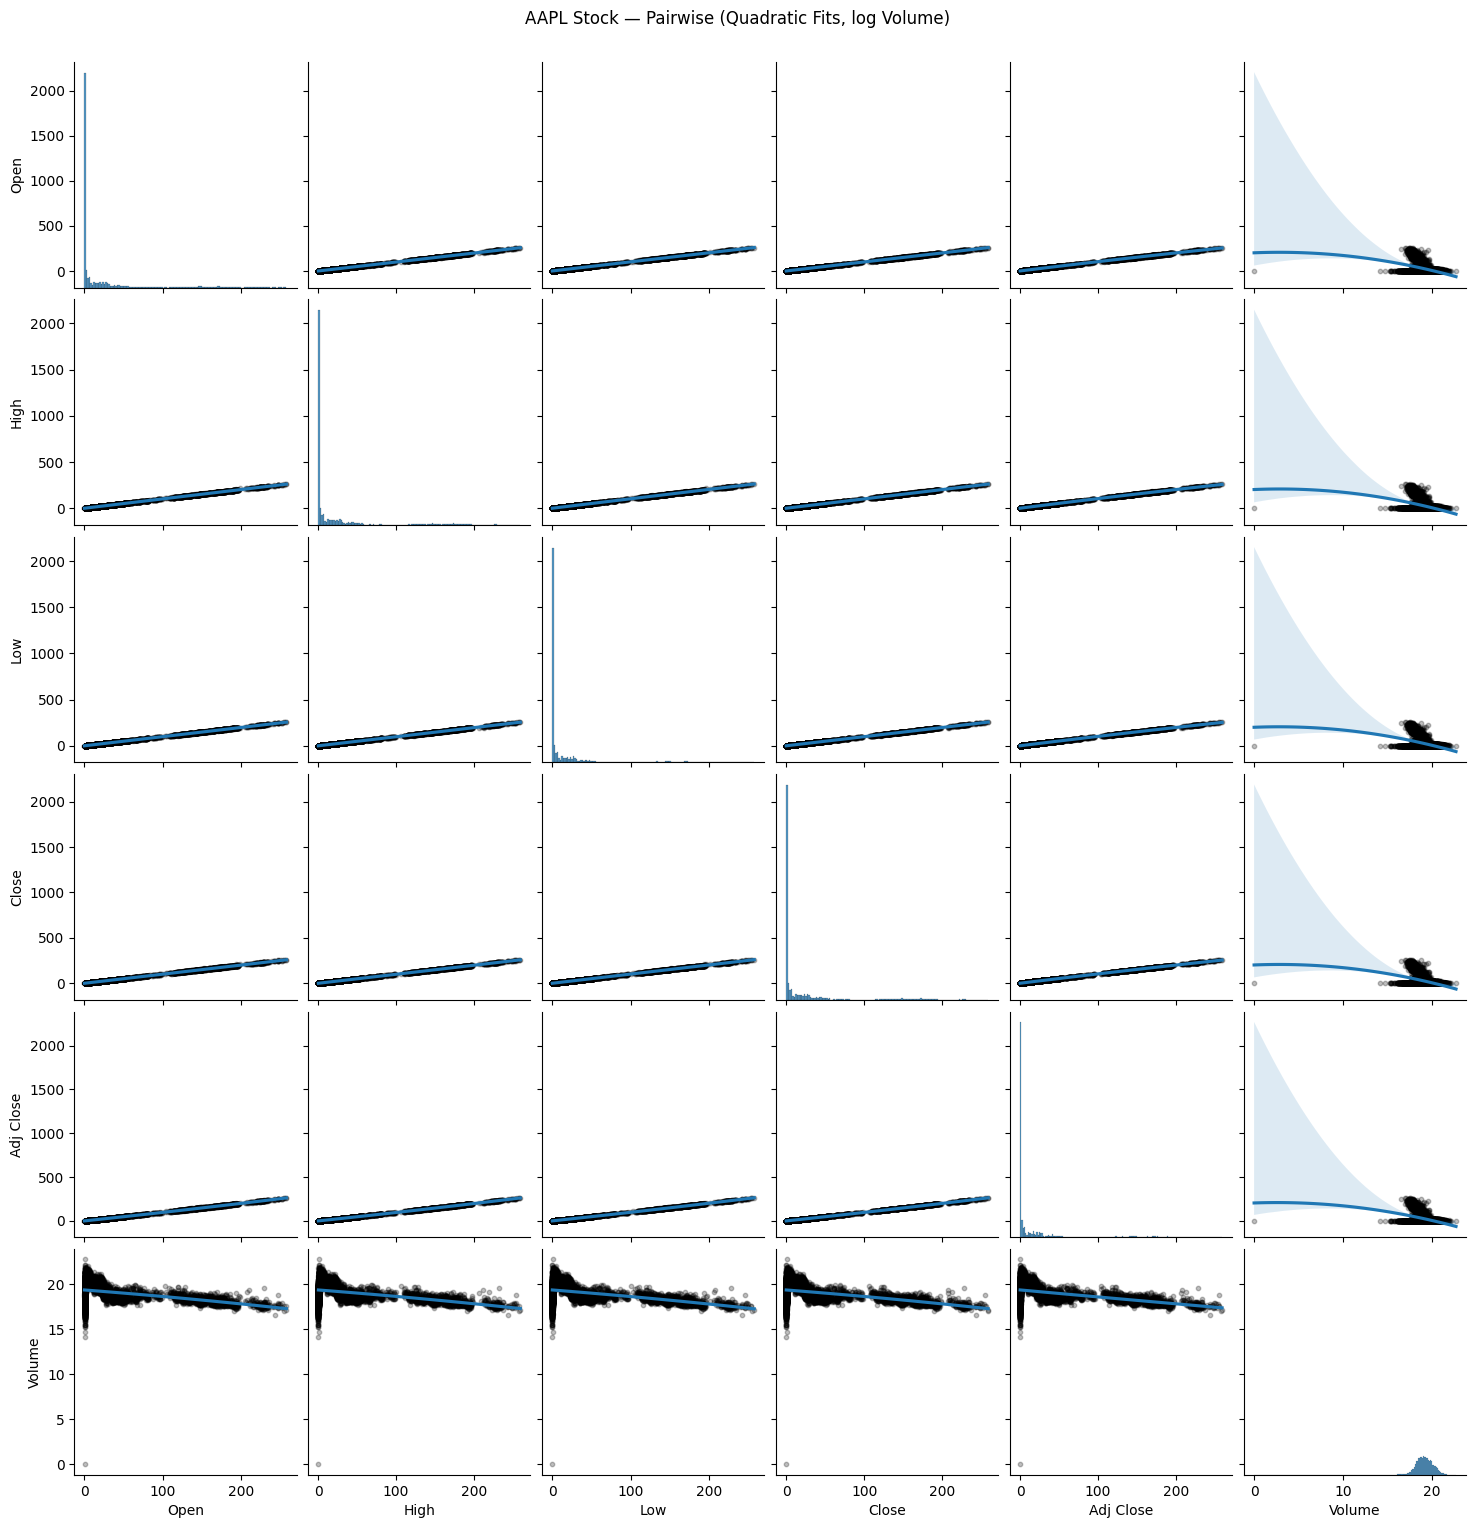

In [28]:
#data cleaning
if 'Unnamed: 0' in df_stock.columns:
  df_stock['Date'] = pd.to_datetime(df_stock['Unnamed: 0'], errors = 'coerce')
  df_stock = df_stock.drop(columns = ['Unnamed: 0'])

for c in ['Open','High','Low','Close','Adj Close','Volume']:
    if c in df_stock.columns:
      df_stock[c] = pd.to_numeric(df_stock[c], errors='coerce')

data = df_stock[['Open','High','Low','Close','Adj Close','Volume']].dropna()

data['Volume'] = np.log1p(data['Volume'])

#plot
g = sns.pairplot(data, kind='reg', diag_kind='hist',
                 plot_kws={
                     'order':2,
                     'scatter_kws':{
                         'alpha':0.25,
                         's':10,
                         'color':'black'}
                     }
                 )
#title
g.fig.suptitle('AAPL Stock — Pairwise (Quadratic Fits, log Volume)', y=1.02)

plt.show()

### Q4: Plot a regression line and confidence interval
Select two of the features from your dataset and create a lmplot that shows the linear regression between them. Filter your data as you see fit. Include a meaningful title for the plot.

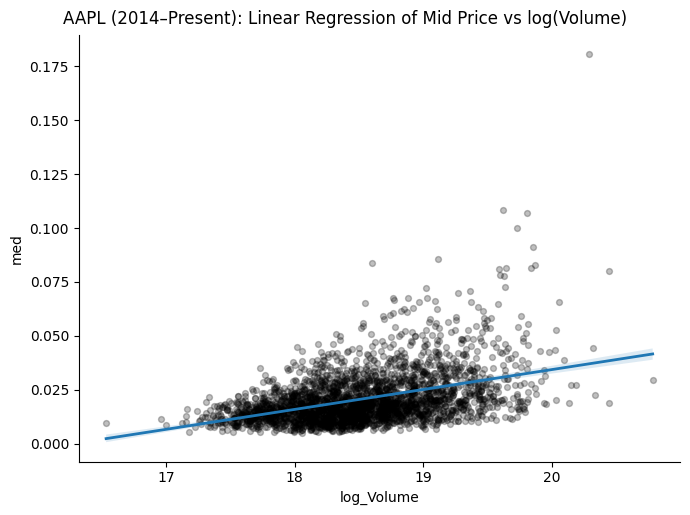

In [34]:
df = df_stock.copy()

#data cleaning
if 'Unnamed: 0' in df.columns: df = df.drop(columns=['Unnamed: 0'])
df['Date'] = pd.to_datetime(df.get('Date', df.iloc[:,0]), errors='coerce')
for c in ['Open','High','Low','Close','Adj Close','Volume']:
    if c in df.columns:
      df[c] = pd.to_numeric(df[c], errors='coerce')

df = df.dropna(subset=['High','Low','Volume','Date'])
df = df[df['Date'] >= '2014-01-01']

#featrues
df['med'] = (df['High'] - df['Low']) / df['Adj Close']
df['log_Volume'] = np.log1p(df['Volume'])

#plot
g = sns.lmplot(
    data = df,
    x = 'log_Volume',
    y = 'med',
    ci = 95,
    height = 5,
    aspect = 1.4,
    scatter_kws = {'alpha':0.25,'s':18,'color':'black'},
    line_kws={'linewidth':2}
)

#labels
g.fig.suptitle('AAPL (2014–Present): Linear Regression of Mid Price vs log(Volume)', y = 1.02)
plt.show()

### Q5. Create a relplot that shows multiple features in a single plot.
Select two features from your dataset and plot a scatter plot. Select two additional features you want to highlight in your data points using `hue` and `size`. Include a meaningful title to the plot.

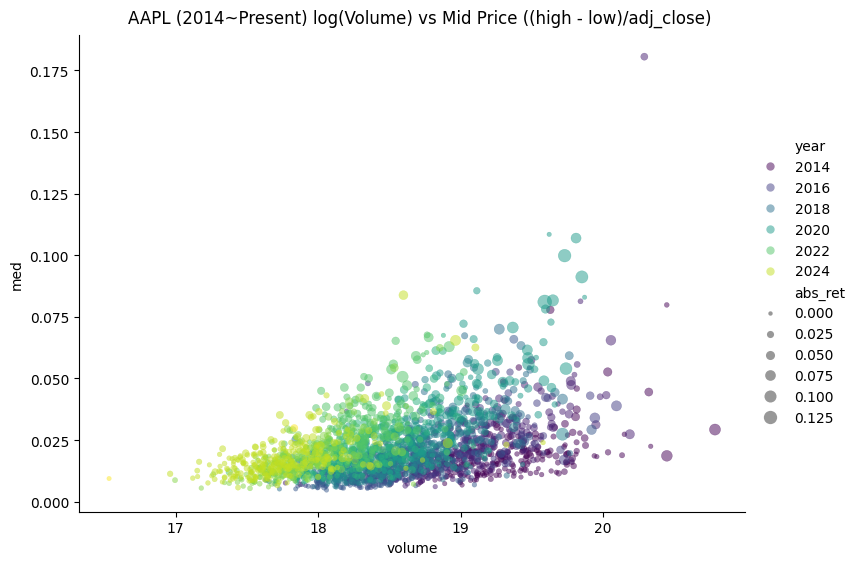

In [38]:
df = df_stock.copy()

#data cleaning
if 'Unnamed: 0' in df.columns: df = df.drop(columns=['Unnamed: 0'])
df['Date'] = pd.to_datetime(df.get('Date', df.iloc[:,0]), errors='coerce')

for c in ['Open','High','Low','Close','Adj Close','Volume']:
    if c in df.columns:
      df[c] = pd.to_numeric(df[c], errors='coerce')

df = df.dropna(subset=['High','Low','Adj Close','Volume','Date'])
df = df[df['Date'] >= '2014-01-01'] # dates > 2014-01-01

# df['med'] = 0.5*(df['High']+df['Low'])
df['med'] = (df['High'] - df['Low']) / df['Adj Close']

#features
df['log_Volume'] = np.log1p(df['Volume'])
df['ret'] = np.log(df['Adj Close']).diff()
df = df.dropna(subset=['ret'])
df['abs_ret'] = df['ret'].abs()
df['year'] = df['Date'].dt.year.astype(int)

#plot
g = sns.relplot(
    data = df,
    x = 'log_Volume',
    y = 'med',
    hue = 'year',
    size = 'abs_ret',
    kind = 'scatter',
    height = 5.5,
    aspect = 1.4,
    palette = 'viridis',
    sizes = (10, 100),
    alpha = 0.5,
    edgecolor = None
)

#labels
g.set_axis_labels('volume', 'med')
g.fig.suptitle('AAPL (2014~Present) log(Volume) vs Mid Price ((high - low)/adj_close)', y = 1.02)
plt.show()

### Q6: Create a plot with small multiples plots
Select two features from your dataset and show the relationship between the features with an additional feature as the single category. Organize the multiple plots to have 3 plots per row. Set the `height` of the plot to 5 and the size the of data point to 20. Include a meaningful title in the plot.

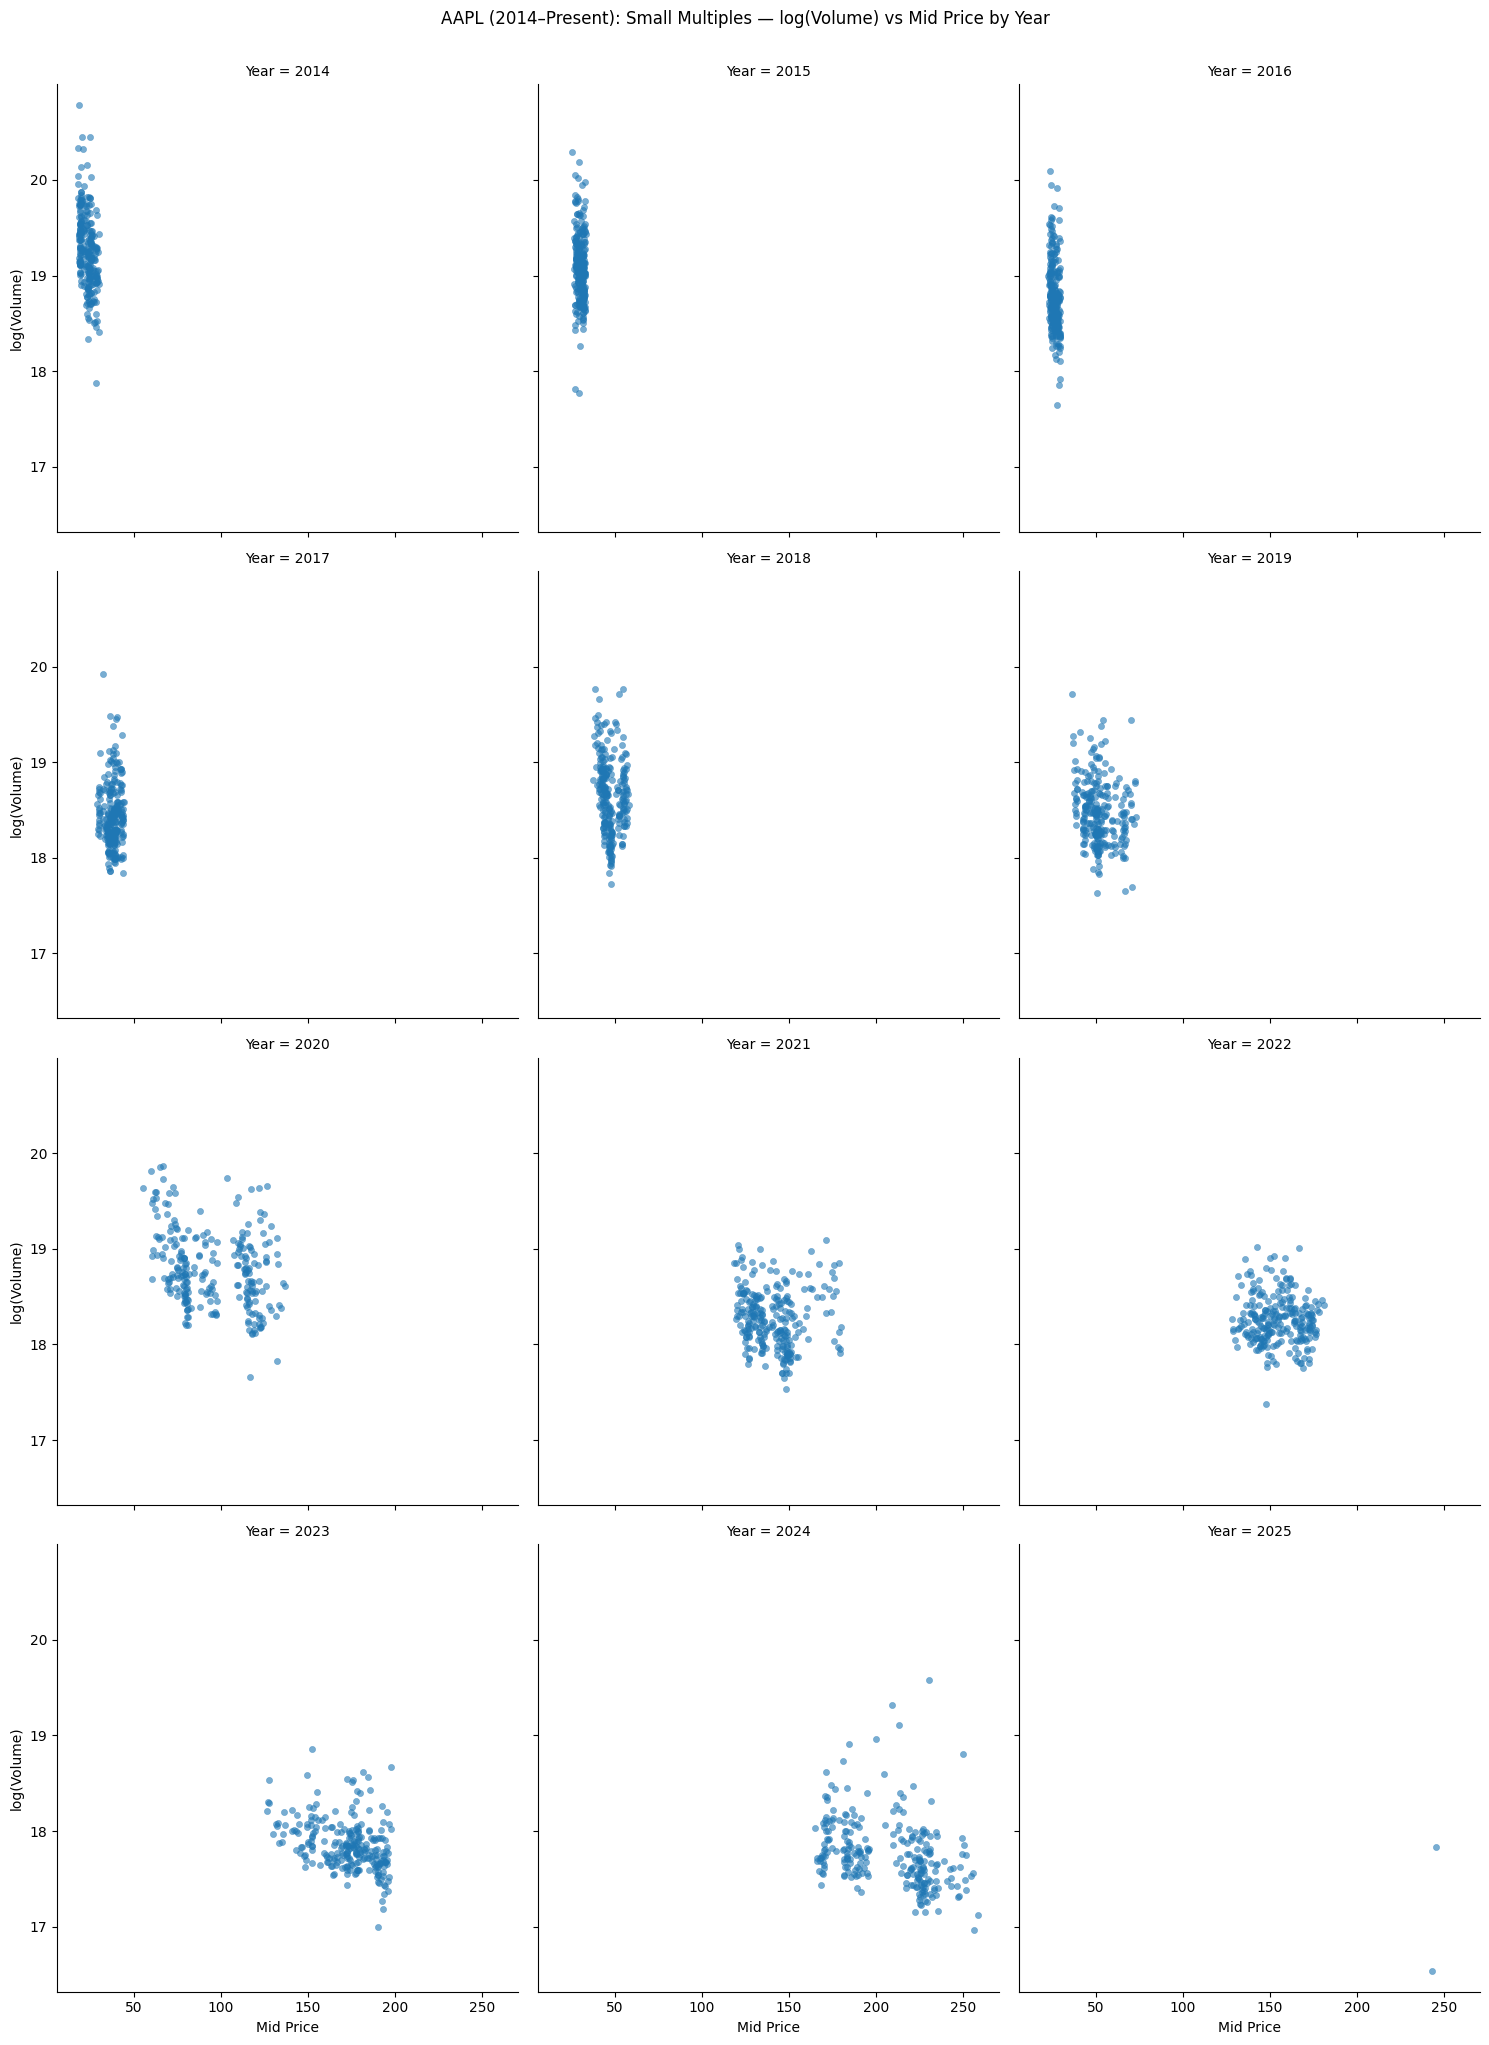

In [41]:
df = df_stock.copy()

#datacleaning
if 'Unnamed: 0' in df.columns: df = df.drop(columns=['Unnamed: 0'])
df['Date'] = pd.to_datetime(df.get('Date', df.iloc[:,0]), errors='coerce')

for c in ['Open','High','Low','Close','Adj Close','Volume']:
    if c in df.columns: df[c] = pd.to_numeric(df[c], errors='coerce')

df = df.dropna(subset=['High','Low','Volume','Date'])
df = df[df['Date'] >= '2014-01-01']

# med-price vs log of trade volume
df['med'] = 0.5*(df['High']+df['Low'])
# df['med'] = (df['High'] - df['Low']) / df['Adj Close']
df['log_Volume'] = np.log1p(df['Volume'])
df['year'] = df['Date'].dt.year.astype(int)

#Relationship: scatter plot
g = sns.relplot(
    data = df,
    x = 'med',
    y = 'log_Volume',
    col = 'year',
    col_wrap = 3,
    kind = 'scatter',
    height = 5,
    s = 20,
    alpha = 0.6,
    edgecolor = None
)

#labels
g.set_axis_labels('Mid Price', 'log(Volume)')
g.set_titles('Year = {col_name}')
g.fig.suptitle('AAPL (2014–Present): Small Multiples — log(Volume) vs Mid Price by Year', y=1.02)

plt.show()

#End of assignment Observation and description
For this assignment, our group focused on the stock dataset, which provides valuable information such as open/close prices, trade volume, and adjusted close prices on a day-by-day basis. Although the dataset extends back to 1980, we narrowed our analysis to the most recent 10 years to look for potential correlations. One interesting pattern we observed was that the mid-price (0.5 × (High + Low)) has generally increased over the years, while at the same time, the log of trading volume has decreased. This inverse relationship is something we would like to explore further to better understand stock behavior and support our future project research.